# Demo of `LaPD6KTransform`

In [33]:
%matplotlib inline

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

In [35]:
try:
    from bapsf_motion.transform import LaPD6KTransform
except ModuleNotFoundError:
    from pathlib import Path

    HERE = Path().cwd()
    BAPSF_MOTION = (HERE / ".." / ".." / ".." ).resolve()
    sys.path.append(str(BAPSF_MOTION))
    
    from bapsf_motion.transform import LaPD6KTransform

General input keyword arguments to use for the demo.

In [36]:
input_kwargs = {
    "pivot_to_center": 57.288,
    "pivot_to_drive": 134.0,
    "pivot_to_feedthru": 21.6,
    "probe_axis_offset": 20.1,
    "droop_correct": False,
}

## Transfrom from Motion Space to Drive Space to Motion Space

Let's show the transform can successfully convert from the motion space to the drive space, and back.

Instantiate the transform class.

In [ ]:
tr = LaPD6KTransform(("x", "y"), **input_kwargs)
tr.config

Construct a set of points in the motion space to convert.

In [38]:
points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

key_points = np.array(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
)

Calcualte the drive space points `dpoints` and return to motion space points `mpoints`.

dpoints = tr(points, to_coords="drive")
mpoints = tr(dpoints, to_coords="motion_space")

Plot the transform

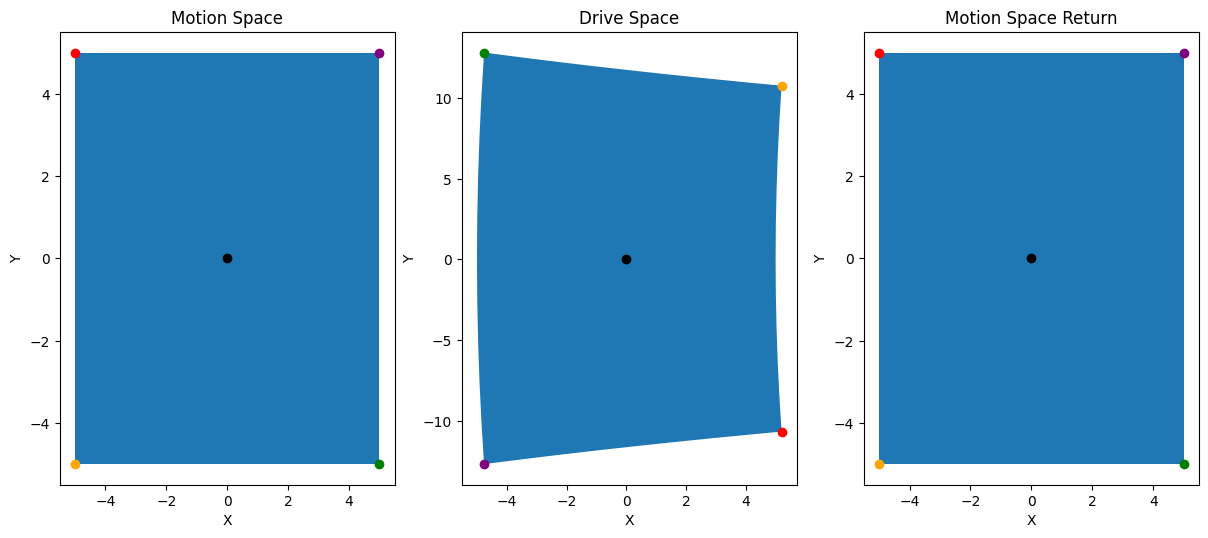

In [40]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figwidth = 1.4 * figwidth
figheight = figheight
fig, axs = plt.subplots(1, 3, figsize=[figwidth, figheight])

axs[0].set_title("Motion Space")
axs[1].set_title("Drive Space")
axs[2].set_title("Motion Space Return")

for ii in range(3):
    axs[ii].set_xlabel("X")
    axs[ii].set_ylabel("Y")

axs[0].fill(points[...,0], points[...,1])
axs[1].fill(dpoints[...,0], dpoints[...,1])
axs[2].fill(mpoints[...,0], mpoints[...,1])

for pt, color in zip(
    key_points.tolist(),
    ["red", "orange", "green", "purple", "black"]
):
    dpt = tr(pt, to_coords="drive")
    mpt = tr(dpt, to_coords="motion_space")
    axs[0].plot(pt[0], pt[1], 'o', color=color)
    axs[1].plot(dpt[..., 0], dpt[..., 1], 'o', color=color)
    axs[2].plot(mpt[..., 0], mpt[..., 1], 'o', color=color)

Are the returned motion space points "identical" to the starting points?

In [41]:
np.allclose(points, mpoints)

True

In [42]:
np.max(np.abs(points - mpoints))

2.0872192862952943e-14

## Transform from Drive Sapce to Motion Space to Drive Space

Let's show the transform can successfully convert from the drive space to the motion space, and back.

Using the same transform and initial points in the previous section, lets construct the motion space points `mpoints` and return to drive space points `dpoints`.

In [46]:
mpoints = tr(points, to_coords="motion_space")
dpoints = tr(mpoints, to_coords="drive")

Plot the transform.

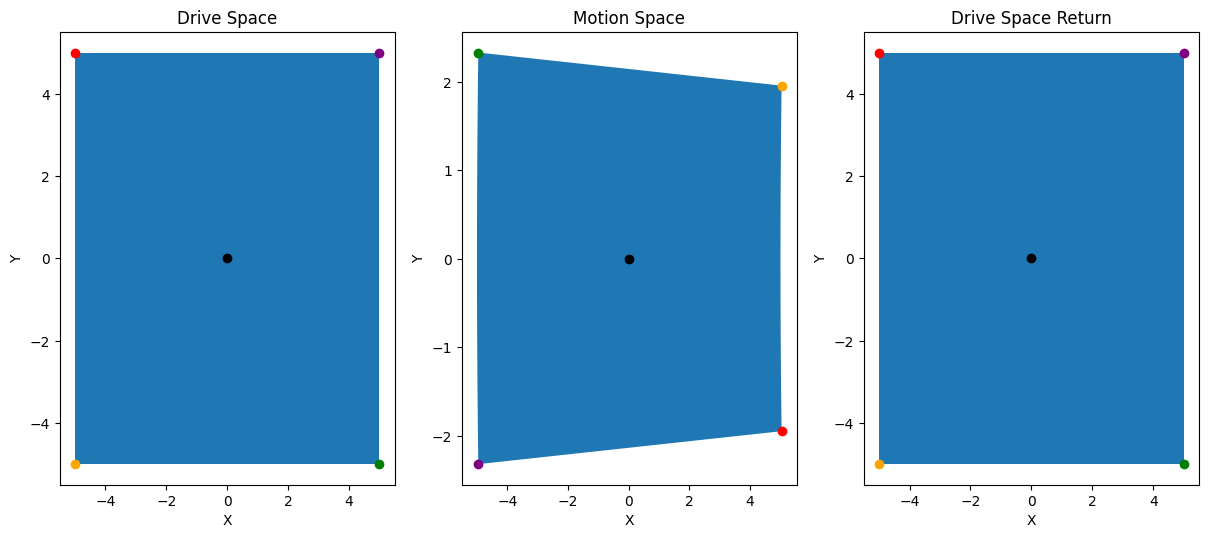

In [47]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figwidth = 1.4 * figwidth
figheight = figheight
fig, axs = plt.subplots(1, 3, figsize=[figwidth, figheight])

axs[0].set_title("Drive Space")
axs[1].set_title("Motion Space")
axs[2].set_title("Drive Space Return")

for ii in range(3):
    axs[ii].set_xlabel("X")
    axs[ii].set_ylabel("Y")

axs[0].fill(points[...,0], points[...,1])
axs[1].fill(mpoints[...,0], mpoints[...,1])
axs[2].fill(dpoints[...,0], dpoints[...,1])

for pt, color in zip(
    key_points.tolist(),
    ["red", "orange", "green", "purple", "black"]
):
    mpt = tr(pt, to_coords="motion_space")
    dpt = tr(mpt, to_coords="drive")
    axs[0].plot(pt[0], pt[1], 'o', color=color)
    axs[1].plot(mpt[..., 0], mpt[..., 1], 'o', color=color)
    axs[2].plot(dpt[..., 0], dpt[..., 1], 'o', color=color)

Are the returned drive space points "identical" to the starting points?

In [48]:
np.allclose(points, dpoints)

True

In [49]:
np.max(np.abs(points - dpoints))

3.197442310920451e-14

## Transform Can Droop Correct

The transform `LaPD6KTransfrom` also incorporates droop correction via the `LaPDXYDroopCorrect` class.

Instantiate the transfrom with droop correction enabled.

In [55]:
tr = LaPD6KTransform(
    ("x", "y"),
    **{
        **input_kwargs,
        "droop_correct": True,
        "droop_scale": 2.0,
    },
)
tr.config

{'droop_correct': True,
 'type': 'lapd_6k',
 'pivot_to_feedthru': 21.6,
 'six_k_arm_length': 93.345,
 'pivot_to_drive': 134.0,
 'droop_scale': 2.0,
 'pivot_to_center': 57.288,
 'drive_polarity': [1, 1],
 'probe_axis_offset': 20.1,
 'mspace_polarity': [-1, 1]}

Construct a set of points for the transform.

In [56]:
points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

key_points = np.array(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
)

Calcualte the drive space points `dpoints` and return to motion space points`mpoints`.

In [57]:
dpoints = tr(points, to_coords="drive")
mpoints = tr(dpoints, to_coords="motion_space")

Plot the transform.

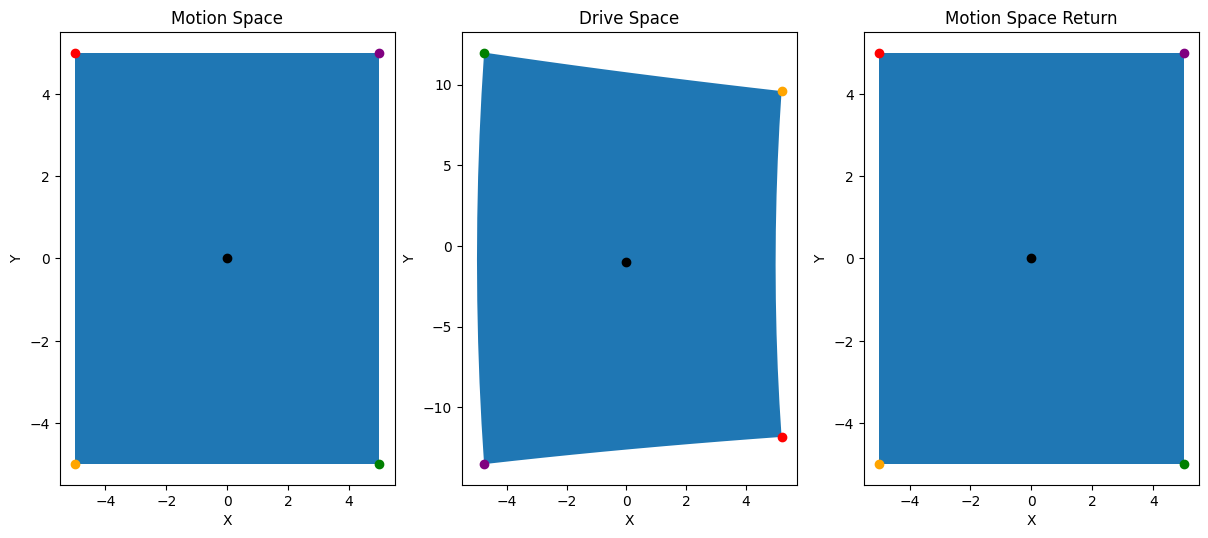

In [58]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figwidth = 1.4 * figwidth
figheight = figheight
fig, axs = plt.subplots(1, 3, figsize=[figwidth, figheight])

axs[0].set_title("Motion Space")
axs[1].set_title("Drive Space")
axs[2].set_title("Motion Space Return")

for ii in range(3):
    axs[ii].set_xlabel("X")
    axs[ii].set_ylabel("Y")

axs[0].fill(points[...,0], points[...,1])
axs[1].fill(dpoints[...,0], dpoints[...,1])
axs[2].fill(mpoints[...,0], mpoints[...,1])

for pt, color in zip(
    key_points.tolist(),
    ["red", "orange", "green", "purple", "black"]
):
    dpt = tr(pt, to_coords="drive")
    mpt = tr(dpt, to_coords="motion_space")
    axs[0].plot(pt[0], pt[1], 'o', color=color)
    axs[1].plot(dpt[..., 0], dpt[..., 1], 'o', color=color)
    axs[2].plot(mpt[..., 0], mpt[..., 1], 'o', color=color)

Are the returned motion space points "identical" to the starting points?

In [59]:
np.allclose(points, mpoints)

True

In [60]:
np.max(np.abs(points - mpoints))

3.632436573752784e-10

## Configure for West Side Deployment

The default values for `LaPD6KTransform` is for an East side depolyment on the LaPD.  However, the transfrom can be configured for a West side deployment by using a negative `pivot_to_center` and `[1, 1]` for the `mspace_polarity`.

In [67]:
tr = LaPD6KTransform(
    ("x", "y"),
    **{
        **input_kwargs,
        "pivot_to_center": -58.771,
        "mspace_polarity": [1, 1],
        "droop_correct": True,
        "droop_scale": 2.0,
    },
)
tr.config

{'droop_correct': True,
 'type': 'lapd_6k',
 'pivot_to_feedthru': 21.6,
 'six_k_arm_length': 93.345,
 'pivot_to_drive': 134.0,
 'droop_scale': 2.0,
 'pivot_to_center': -58.771,
 'drive_polarity': [1, 1],
 'probe_axis_offset': 20.1,
 'mspace_polarity': [1, 1]}

In [68]:
points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

key_points = np.array(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
)

dpoints = tr(points, to_coords="drive")
mpoints = tr(dpoints, to_coords="motion_space")

Plot the transform.

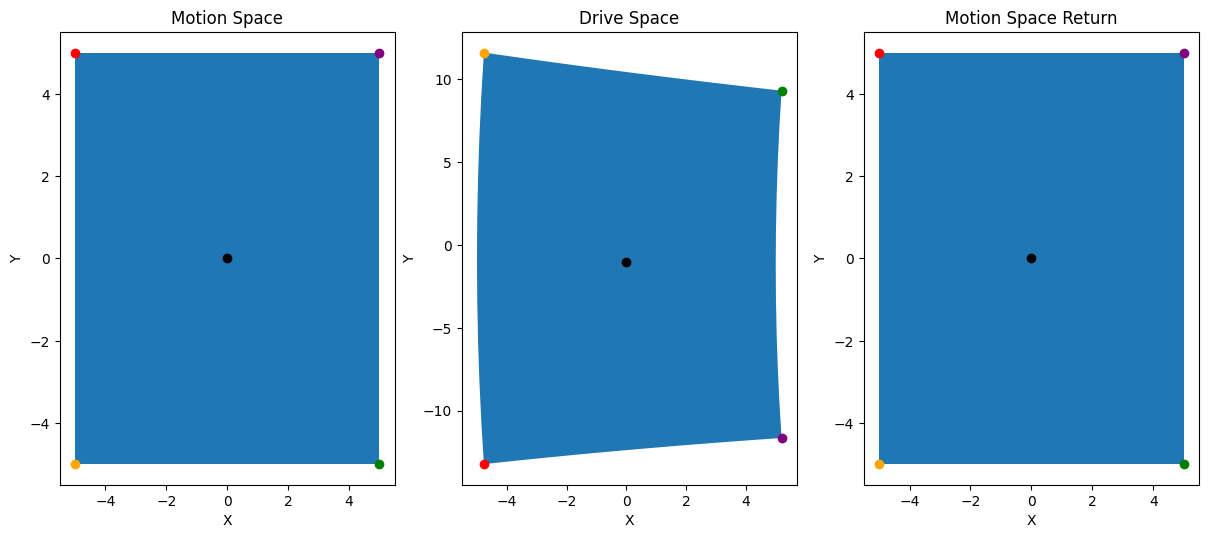

In [69]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figwidth = 1.4 * figwidth
figheight = figheight
fig, axs = plt.subplots(1, 3, figsize=[figwidth, figheight])

axs[0].set_title("Motion Space")
axs[1].set_title("Drive Space")
axs[2].set_title("Motion Space Return")

for ii in range(3):
    axs[ii].set_xlabel("X")
    axs[ii].set_ylabel("Y")

axs[0].fill(points[...,0], points[...,1])
axs[1].fill(dpoints[...,0], dpoints[...,1])
axs[2].fill(mpoints[...,0], mpoints[...,1])

for pt, color in zip(
    key_points.tolist(),
    ["red", "orange", "green", "purple", "black"]
):
    dpt = tr(pt, to_coords="drive")
    mpt = tr(dpt, to_coords="motion_space")
    axs[0].plot(pt[0], pt[1], 'o', color=color)
    axs[1].plot(dpt[..., 0], dpt[..., 1], 'o', color=color)
    axs[2].plot(mpt[..., 0], mpt[..., 1], 'o', color=color)

Are the returned motion space points "identical" to the starting points?

In [70]:
np.allclose(points, mpoints)

True

In [71]:
np.max(np.abs(points - mpoints))

3.9968739429241396e-10